In [4]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)



In [8]:
#Only get data analyst jobs in US
df_DA_US = df[(df['job_title_short']=="Data Analyst") & (df['job_country']=='United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization 
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [9]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
288,150000.0,nosql
288,150000.0,sql
288,150000.0,vba
288,150000.0,oracle
288,150000.0,hadoop
...,...,...
787107,198000.0,mxnet
787107,198000.0,tensorflow
787107,198000.0,numpy
787107,198000.0,hadoop


In [10]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)


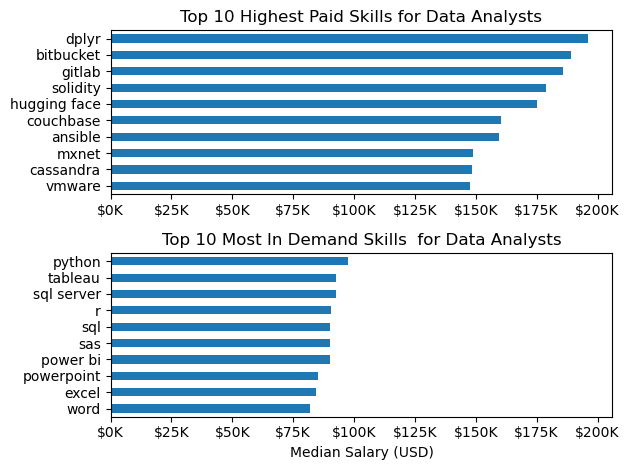

In [12]:
fig,ax=plt.subplots(2,1)

#Top 10 Highest paid skill for Data Analysis 
df_DA_top_pay[::-1].plot(kind='barh' , y='median' , ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#Top 10 Most In-Demand skills for Data Analysis 
df_DA_skills[::-1].plot(kind='barh',y='median' , ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In Demand Skills  for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

fig.tight_layout()